# Support Vector Machines approach

Support Vector Machines algorithm is a supervised machine learning algorithm that supports classification problems. It does so by attempting to drive a separation boundary as cleanly as possible between data points in hopes of accurately classifying the data according to the categories specified.

To generalize, the objective is to find a hyperplane that maximizes the separation of the data points to their potential classes in an n-dimensional space. The data points with the minimum distance to the hyperplane (closest points) are called Support Vectors.

ref: https://www.baeldung.com/cs/svm-multiclass-classification

## 1. Import the packages

In [29]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

import seaborn as sb
sb.set() #Set the default seaborn style for graphics
import matplotlib.pyplot as plt
%matplotlib inline

import random
np.random.seed(42)

---

## 2. Import the data

In [13]:
# Regular Train and Test sets, as previously split
X_train = pd.read_csv('Data/x_train.csv')
X_test = pd.read_csv('Data/x_test.csv')
y_train = pd.read_csv('Data/y_train.csv') 
y_test = pd.read_csv('Data/y_test.csv')

In [3]:
# Train and Test sets for Feature-engineered data
X_train_EGIN = pd.read_csv('Data/x_trainEGIN.csv')
X_test_EGIN = pd.read_csv('Data/x_testEGIN.csv')

> With the use of a training set that has clearly labelled the category each entry belongs to (under 'Salary'), we can see that **SVM is a Supervised Learning Algorithm**.

---

## 3. Implementing Support Vector Machines (SVMs) through the various kernels

### 3.1 Radial Basis Function (RBF) kernel with default parameters
#### 3.1a Using regular data

In [3]:
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr', random_state = 42).fit(X_train, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     12726
           2       1.00      1.00      1.00     12898
           3       0.99      1.00      1.00     13145
           4       1.00      1.00      1.00     12426

    accuracy                           1.00     51195
   macro avg       1.00      1.00      1.00     51195
weighted avg       1.00      1.00      1.00     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.70      0.06      0.12      3276
           2       0.37      0.05      0.09      3193
           3       0.25      0.93      0.40      3230
           4       0.58      0.05      0.09      3100

    accuracy                           0.27     12799
   macro avg       0.48      0.27      0.17     12799
weighted avg       0.48      0.27      0.17     12799



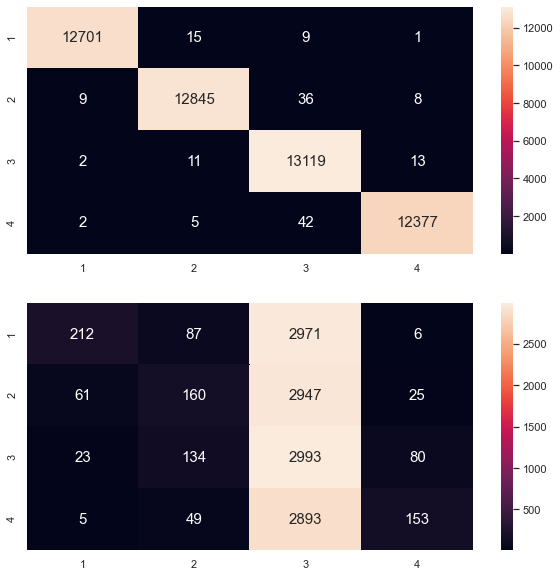

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, rbf.predict(X_train)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, rbf.predict(X_test)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,rbf.predict(X_train)))
print("=========TEST DATA==========")
print(classification_report(y_test,rbf.predict(X_test)))

In [5]:
rbf_pred = rbf.predict(X_test)

rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')

print('F1 (RBF Kernel): ', "%.6f" % rbf_f1)

F1 (RBF Kernel):  0.174888


> We are able to observe from the confusion matrix that that the **rbf kernel notably performs extremely well in training**, but **does not do well at all on the test set**, incorrectly predicting almost all the entries under a single category '3'. This leads to a very poor F1-score.

#### 3.1b Using feature-engineered data

In [19]:
rbf_EGIN = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr', random_state = 42).fit(X_train_EGIN, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.97      0.96      0.97     12726
           2       0.93      0.93      0.93     12898
           3       0.91      0.92      0.92     13145
           4       0.94      0.93      0.94     12426

    accuracy                           0.94     51195
   macro avg       0.94      0.94      0.94     51195
weighted avg       0.94      0.94      0.94     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.65      0.32      0.43      3276
           2       0.29      0.67      0.40      3193
           3       0.42      0.28      0.34      3230
           4       0.64      0.33      0.43      3100

    accuracy                           0.40     12799
   macro avg       0.50      0.40      0.40     12799
weighted avg       0.50      0.40      0.40     12799



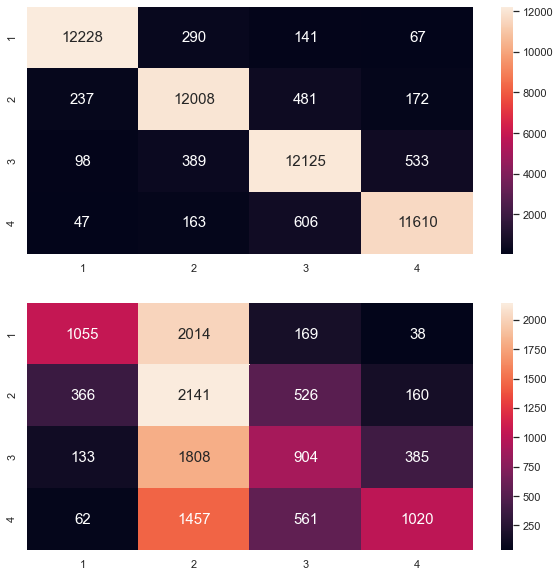

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, rbf_EGIN.predict(X_train_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, rbf_EGIN.predict(X_test_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,rbf_EGIN.predict(X_train_EGIN)))
print("=========TEST DATA==========")
print(classification_report(y_test,rbf_EGIN.predict(X_test_EGIN)))

In [6]:
rbf_pred_EGIN = rbf_EGIN.predict(X_test_EGIN)

rbf_f1_EGIN = f1_score(y_test, rbf_pred_EGIN, average='weighted')

print('F1 (RBF Kernel EGIN): ', "%.6f" % rbf_f1_EGIN)

F1 (RBF Kernel EGIN):  0.400765


> We are able to observe from the confusion matrix that that the **rbf kernel notably performs extremely well in training**, and did significantly better with the test set. 

>Considering this was performed under the feature-engineered data as compared to previously on the regular data, feature-engineering seems to have managed to improve the performance of this particular kernel. However, F-1 score performance is still regarded as low.

It is clear that on the rbf kernel, we are experiencing a perennial **problem of overfitting** on both the regular and feature engineered data, with extremely high performance on on the train set but otherwise on the test set.

### 3.2 Polynomial kernel with default parameters
#### 3.2a Using regular data

In [21]:
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr', random_state = 42).fit(X_train, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.68      0.10      0.18     12726
           2       0.36      0.21      0.27     12898
           3       0.29      0.14      0.19     13145
           4       0.30      0.84      0.44     12426

    accuracy                           0.32     51195
   macro avg       0.41      0.32      0.27     51195
weighted avg       0.41      0.32      0.27     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.72      0.10      0.18      3276
           2       0.34      0.20      0.25      3193
           3       0.27      0.13      0.18      3230
           4       0.29      0.84      0.43      3100

    accuracy                           0.31     12799
   macro avg       0.41      0.32      0.26     12799
weighted avg       0.41      0.31      0.26     12799



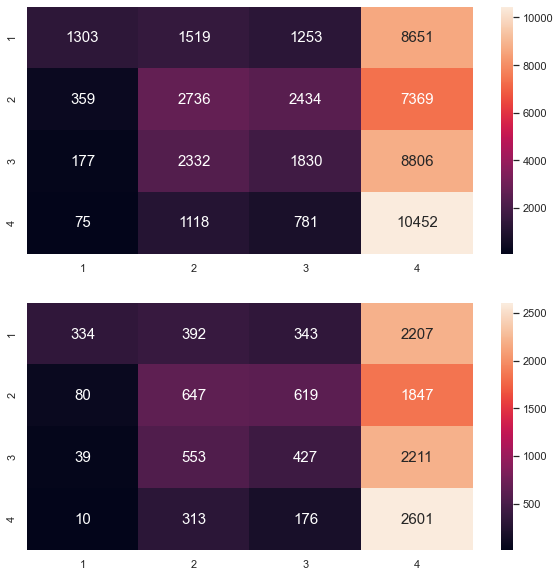

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, poly.predict(X_train)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, poly.predict(X_test)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,poly.predict(X_train)))
print("=========TEST DATA==========")
print(classification_report(y_test,poly.predict(X_test)))

In [8]:
poly_pred = poly.predict(X_test)

poly_f1 = f1_score(y_test, poly_pred, average='weighted')

print('F1 (Polynomial Kernel): ', "%.6f" % poly_f1)

F1 (Polynomial Kernel):  0.259292


> We are able to observe from the confusion matrix that that the **polynomial kernel performs very similarly on both the train and test sets**, incorrectly predicting most of the entries under a single category '4' in both cases. This leads to a very poor F1-score.

#### 3.2b Using feature-engineered data

In [23]:
poly_EGIN = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr', random_state = 42).fit(X_train_EGIN, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       1.00      0.00      0.00     12726
           2       0.35      0.27      0.31     12898
           3       0.30      0.08      0.13     13145
           4       0.29      0.87      0.43     12426

    accuracy                           0.30     51195
   macro avg       0.48      0.31      0.22     51195
weighted avg       0.48      0.30      0.22     51195

=========TEST DATA==========


C:\Users\65932\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\65932\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\65932\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3276
           2       0.33      0.26      0.29      3193
           3       0.25      0.07      0.11      3230
           4       0.28      0.87      0.43      3100

    accuracy                           0.29     12799
   macro avg       0.22      0.30      0.21     12799
weighted avg       0.22      0.29      0.20     12799



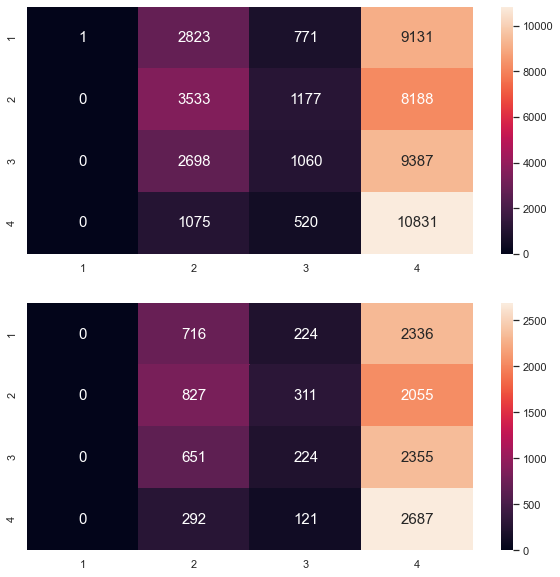

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, poly_EGIN.predict(X_train_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, poly_EGIN.predict(X_test_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,poly_EGIN.predict(X_train_EGIN)))
print("=========TEST DATA==========")
print(classification_report(y_test,poly_EGIN.predict(X_test_EGIN)))

In [9]:
poly_pred_EGIN = poly_EGIN.predict(X_test_EGIN)

poly_f1_EGIN = f1_score(y_test, poly_pred_EGIN, average='weighted')

print('F1 (Polynomial Kernel EGIN): ', "%.6f" % poly_f1_EGIN)

F1 (Polynomial Kernel EGIN):  0.204022


> We are able to observe from the confusion matrix that that the **polynomial kernel performs very similarly on both the train and test sets**, incorrectly predicting most of the entries under a single category '4' in both cases. This leads to a very poor F1-score. 

>We also observe that the use of feature engineering led to a lower performance in this situation.

### 3.3 Hyperbolic Tangent (Sigmoid) kernel with default parameters
#### 3.3a Using regular data

In [25]:
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovr', random_state = 42).fit(X_train, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.40      0.11      0.18     12726
           2       0.31      0.49      0.38     12898
           3       0.25      0.42      0.31     13145
           4       0.43      0.17      0.24     12426

    accuracy                           0.30     51195
   macro avg       0.35      0.30      0.28     51195
weighted avg       0.35      0.30      0.28     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.42      0.11      0.17      3276
           2       0.31      0.48      0.37      3193
           3       0.25      0.45      0.32      3230
           4       0.44      0.18      0.25      3100

    accuracy                           0.30     12799
   macro avg       0.36      0.30      0.28     12799
weighted avg       0.36      0.30      0.28     12799



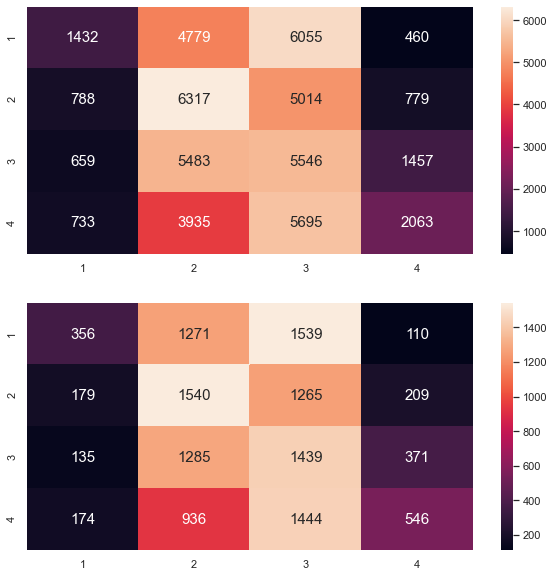

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, sig.predict(X_train)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, sig.predict(X_test)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,sig.predict(X_train)))
print("=========TEST DATA==========")
print(classification_report(y_test,sig.predict(X_test)))

In [11]:
sig_pred = sig.predict(X_test)

sig_f1 = f1_score(y_test, sig_pred, average='weighted')

print('F1 (Sigmoid Kernel): ', "%.6f" % sig_f1)

F1 (Sigmoid Kernel):  0.280103


> We are able to observe from the confusion matrix that that the **sigmoid kernel performs very similarly on both the train and test sets**, incorrectly predicting most the entries under the categories '2' and '3' in both cases. This leads to a very poor F1-score.

#### 3.3b Using feature-engineered data

In [27]:
sig_EGIN = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovr', random_state = 42).fit(X_train_EGIN, y_train.values.ravel())

=========TRAIN DATA=========
              precision    recall  f1-score   support

           1       0.32      0.52      0.39     12726
           2       0.29      0.51      0.37     12898
           3       0.22      0.04      0.07     13145
           4       0.51      0.22      0.31     12426

    accuracy                           0.32     51195
   macro avg       0.34      0.32      0.29     51195
weighted avg       0.33      0.32      0.28     51195

=========TEST DATA==========
              precision    recall  f1-score   support

           1       0.32      0.51      0.39      3276
           2       0.29      0.51      0.37      3193
           3       0.25      0.04      0.08      3230
           4       0.50      0.22      0.31      3100

    accuracy                           0.32     12799
   macro avg       0.34      0.32      0.29     12799
weighted avg       0.34      0.32      0.29     12799



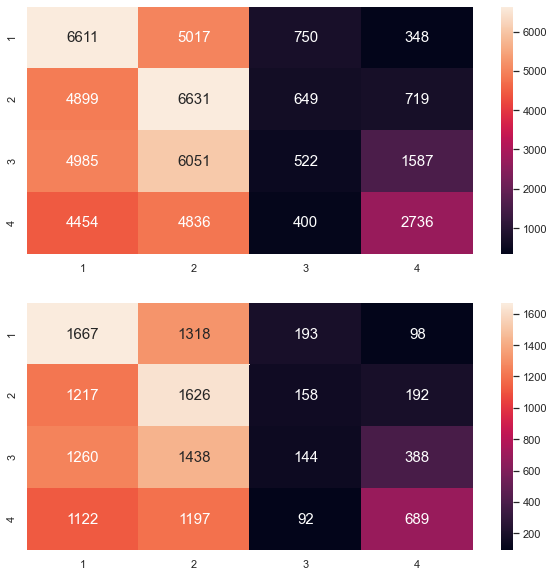

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, sig_EGIN.predict(X_train_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, sig_EGIN.predict(X_test_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

print("=========TRAIN DATA=========")
print(classification_report(y_train,sig_EGIN.predict(X_train_EGIN)))
print("=========TEST DATA==========")
print(classification_report(y_test,sig_EGIN.predict(X_test_EGIN)))

In [12]:
sig_pred_EGIN = sig_EGIN.predict(X_test_EGIN)

sig_f1_EGIN = f1_score(y_test, sig_pred_EGIN, average='weighted')

print('F1 (Sigmoid Kernel EGIN): ', "%.6f" % sig_f1_EGIN)

F1 (Sigmoid Kernel EGIN):  0.286146


> We are able to observe from the confusion matrix that that the **sigmoid kernel performs very similarly on both the train and test sets**, incorrectly predicting most the entries under the categories '1' and '2' in both cases. This leads to a very poor F1-score.

> We also observe that the use of feature engineering has not given much positive result over the regular data in the sigmoid kernel with a very small improvement in F-1 score. Generally, the performance of this kernel between both datasets share similarities.

### 3.4 Linear kernel with default parameters

In [ ]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr', random_state = 42).fit(X_train, y_train.values.ravel())
linear_pred = linear.predict(X_test)

linear_f1 = f1_score(y_test, linear_pred, average='weighted')

print('F1 (Linear Kernel): ', "%.6f" % linear_f1)

> Our team had attempted to implement the linear kernel, but unfortunately the runtime for the very first iteration was in excess of 16 hours and could not be completed, hence we had decided to abandon further attempts under the linear kernel.

---

### 4. Insights

##### On the use of Support Vector Machines for our classification problem:
From this initial run with default parameters, it is evident that SVMs are not doing well. There was clear overfitting experienced during the testing of the rbf kernel as well. Aside from low performance from the initial runs under default parameters, the kernels were generally time inefficient and resource exhaustive, making any further venture into hyperparameter tuning extremely taxing and exhausting. This is likely due to the relatively, extremely large size of the dataset.

In fact, we did attempt to pursue hyperparameter tuning, starting from the kernels that were the most time-efficient in our cases (polynomial and sigmoid) and keeping the parameter variables as generalised as possible, ie. instead of 1 to 100 in intervals of 1, 1 to 100 in intervals of 10. However, even after 24 hours, there was to be no output, which made our team question the viability of this model for the classification problem, and further explore other models.

We learnt that SVMs are in fact effective for small training datasets, datasets where number of dimensions are greater than the number of samples and small datasets in general. SVMs are known as low-complexity models which work well with small datasets. 

Datasets with more noise will decrease SVMs performance as well.

##### On the implementation of feature engineering to improve performance:
It is inconclusive overall across the kernels as to whether feature engineering is able to provide better performance across the board. However, there is strong evidence that it is able to do so at least in the context of the rbf kernel, as observed in the stark differences between the confusion matrices during test.